Importation des librairies

In [2]:
import pandas as pd

chargement du fichier csv

In [5]:
df_walmart = pd.read_csv("Walmart.csv")

Inspection des données

In [12]:
print("Aperçu des 5 premières lignes du CSV :")
print(df_walmart.head())

print("Informations sur les données ")
print(df_walmart.info())


Aperçu des 5 premières lignes du CSV :
   transaction_id  customer_id  product_id product_name     category  \
0               1         2824         843       Fridge  Electronics   
1               2         1409         135           TV  Electronics   
2               3         5506         391       Fridge  Electronics   
3               4         5012         710   Smartphone  Electronics   
4               5         4657         116       Laptop  Electronics   

   quantity_sold  unit_price transaction_date  store_id   store_location  ...  \
0              3      188.46  3/31/2024 21:46         3        Miami, FL  ...   
1              4     1912.04  7/28/2024 12:45         5       Dallas, TX  ...   
2              4     1377.75   6/10/2024 4:55         1  Los Angeles, CA  ...   
3              5      182.31   8/15/2024 1:03         5        Miami, FL  ...   
4              3      499.28   9/13/2024 0:45         6      Chicago, IL  ...   

   customer_loyalty_level  payment_method

Nettoyage des données

In [15]:
print("Vérification des valeurs manquantes ---\n")
valeurs_manquantes = df_walmart.isnull().sum()
print(valeurs_manquantes)

Vérification des valeurs manquantes ---

transaction_id               0
customer_id                  0
product_id                   0
product_name                 0
category                     0
quantity_sold                0
unit_price                   0
transaction_date             0
store_id                     0
store_location               0
inventory_level              0
reorder_point                0
reorder_quantity             0
supplier_id                  0
supplier_lead_time           0
customer_age                 0
customer_gender              0
customer_income              0
customer_loyalty_level       0
payment_method               0
promotion_applied            0
promotion_type            3407
weather_conditions           0
holiday_indicator            0
weekday                      0
stockout_indicator           0
forecasted_demand            0
actual_demand                0
dtype: int64


Gérer les valeurs manquantes dans 'promotion_type'

In [20]:
df_walmart['promotion_type'] = df_walmart['promotion_type'].fillna('None')
gestion_valeurs_manquantes = df_walmart.isnull().sum()
print(gestion_valeurs_manquantes)

transaction_id            0
customer_id               0
product_id                0
product_name              0
category                  0
quantity_sold             0
unit_price                0
transaction_date          0
store_id                  0
store_location            0
inventory_level           0
reorder_point             0
reorder_quantity          0
supplier_id               0
supplier_lead_time        0
customer_age              0
customer_gender           0
customer_income           0
customer_loyalty_level    0
payment_method            0
promotion_applied         0
promotion_type            0
weather_conditions        0
holiday_indicator         0
weekday                   0
stockout_indicator        0
forecasted_demand         0
actual_demand             0
dtype: int64


Vérification des doublons

In [23]:
duplicates = df_walmart.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 0


Conversion des dates

In [32]:
print("Conversion de la colonne transaction_date")
df_walmart['transaction_date'] = pd.to_datetime(df_walmart['transaction_date'], errors='coerce').dt.date
print(df_walmart['transaction_date'].head())

Conversion de la colonne transaction_date
0    2024-03-31
1    2024-07-28
2    2024-06-10
3    2024-08-15
4    2024-09-13
Name: transaction_date, dtype: object


Vérification des colonnes numériques

In [35]:
print("Résumé des colonnes numériques")
colonnes_numeriques_resume = df_walmart.describe()
print(colonnes_numeriques_resume)

Résumé des colonnes numériques
       transaction_id  customer_id   product_id  quantity_sold   unit_price  \
count     5000.000000  5000.000000  5000.000000    5000.000000  5000.000000   
mean      2500.500000  5542.497200   551.233400       2.982800  1023.467294   
std       1443.520003  2582.126997   258.826606       1.419474   559.614242   
min          1.000000  1001.000000   100.000000       1.000000    50.100000   
25%       1250.750000  3279.000000   322.000000       2.000000   537.775000   
50%       2500.500000  5558.000000   559.000000       3.000000  1029.175000   
75%       3750.250000  7767.250000   776.000000       4.000000  1506.307500   
max       5000.000000  9998.000000   999.000000       5.000000  1999.850000   

          store_id  inventory_level  reorder_point  reorder_quantity  \
count  5000.000000      5000.000000    5000.000000       5000.000000   
mean     10.525000       253.121800      99.788000        200.517000   
std       5.786888       142.885456      

Vérification des colonnes catégorielles

In [38]:
print(" Résumé des colonnes catégorielles ---\n")
colonnes_categorielles_resume = df_walmart.select_dtypes(include=['object', 'bool']).describe()
print(colonnes_categorielles_resume)

 Résumé des colonnes catégorielles ---

       product_name     category transaction_date   store_location  \
count          5000         5000             5000             5000   
unique            8            2              260                5   
top          Fridge  Electronics       2024-08-26  Los Angeles, CA   
freq            655         2585               33             1038   

       customer_gender customer_loyalty_level payment_method  \
count             5000                   5000           5000   
unique               3                      4              4   
top               Male               Platinum    Credit Card   
freq              1682                   1299           1281   

       promotion_applied promotion_type weather_conditions holiday_indicator  \
count               5000           5000               5000              5000   
unique                 2              3                  4                 2   
top                 True           None         

In [40]:
print(" Nettoyage terminé. Données prêtes pour l'analyse exploratoire ")

 Nettoyage terminé. Données prêtes pour l'analyse exploratoire 


ANALYSE EXPLORATOIRE

In [46]:
#importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

Analyse des ventes par catégorie


--- Ventes par catégorie ---

category
Appliances     7169
Electronics    7745
Name: quantity_sold, dtype: int64


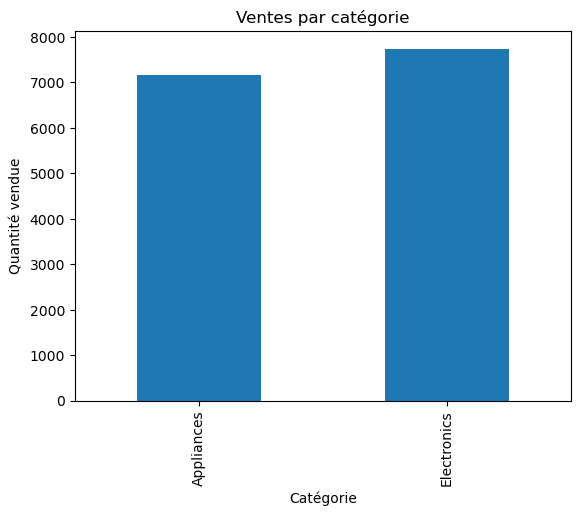

In [51]:
ventes_par_categorie = df_walmart.groupby('category')['quantity_sold'].sum()
print("\n--- Ventes par catégorie ---\n")
print(ventes_par_categorie)
ventes_par_categorie.plot(kind='bar', title='Ventes par catégorie', xlabel='Catégorie', ylabel='Quantité vendue')
plt.show()

Analyse des ventes par localisation


--- Ventes par localisation ---

store_location
Chicago, IL        3085
Dallas, TX         2892
Los Angeles, CA    3168
Miami, FL          2834
New York, NY       2935
Name: quantity_sold, dtype: int64


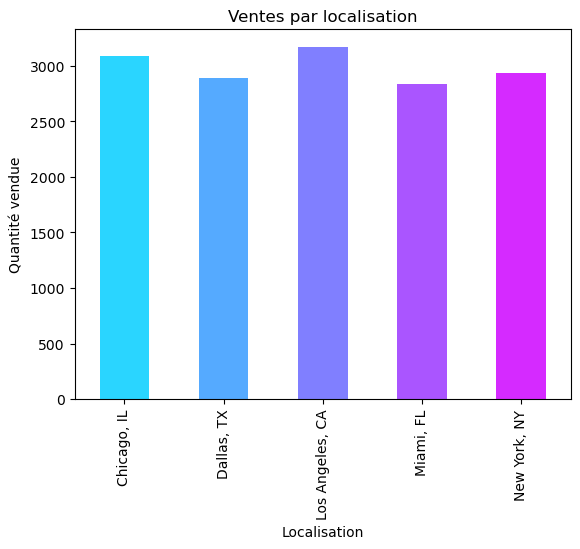

In [58]:
ventes_par_localisation = df_walmart.groupby('store_location')['quantity_sold'].sum()
print("\n--- Ventes par localisation ---\n")
print(ventes_par_localisation)
ventes_par_localisation.plot(kind='bar', title='Ventes par localisation', xlabel='Localisation', ylabel='Quantité vendue', color=sns.color_palette("cool", len(ventes_par_localisation)))
plt.show()

Analyse de l'impact des promotions


--- Impact des promotions ---

promotion_applied
False    7134
True     7780
Name: quantity_sold, dtype: int64


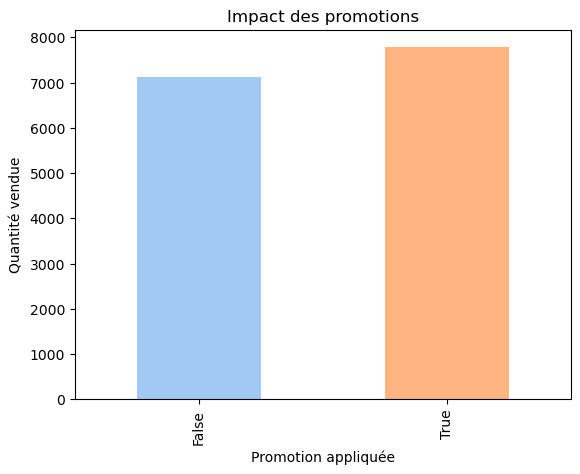

In [61]:
promotions_impact = df_walmart.groupby('promotion_applied')['quantity_sold'].sum()
print("\n--- Impact des promotions ---\n")
print(promotions_impact)
promotions_impact.plot(kind='bar', title='Impact des promotions', xlabel='Promotion appliquée', ylabel='Quantité vendue', color=sns.color_palette("pastel", len(promotions_impact)))
plt.show()


Analyse de l'impact des conditions météo


--- Impact des conditions météo ---

weather_conditions
Cloudy    3823
Rainy     3545
Stormy    3707
Sunny     3839
Name: quantity_sold, dtype: int64


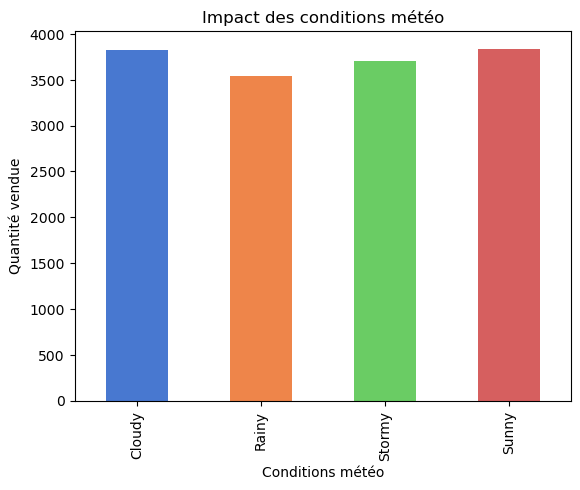

In [64]:
meteo_impact = df_walmart.groupby('weather_conditions')['quantity_sold'].sum()
print("\n--- Impact des conditions météo ---\n")
print(meteo_impact)
meteo_impact.plot(kind='bar', title='Impact des conditions météo', xlabel='Conditions météo', ylabel='Quantité vendue', color=sns.color_palette("muted", len(meteo_impact)))
plt.show()

Répartition des prix unitaires

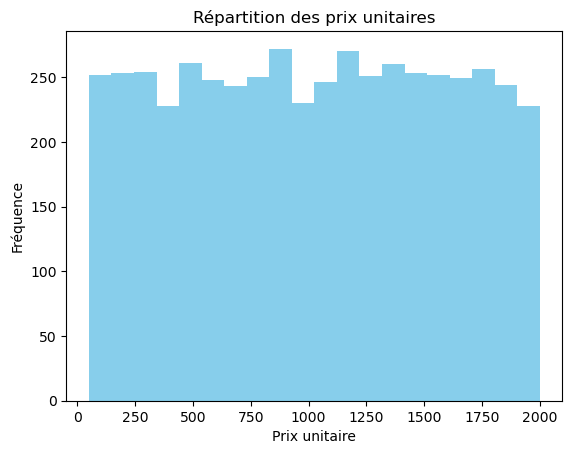

In [68]:
df_walmart['unit_price'].plot(kind='hist', bins=20, title='Répartition des prix unitaires', color='skyblue')
plt.xlabel('Prix unitaire')
plt.ylabel('Fréquence')
plt.show()

Impact des promotions par catégorie 

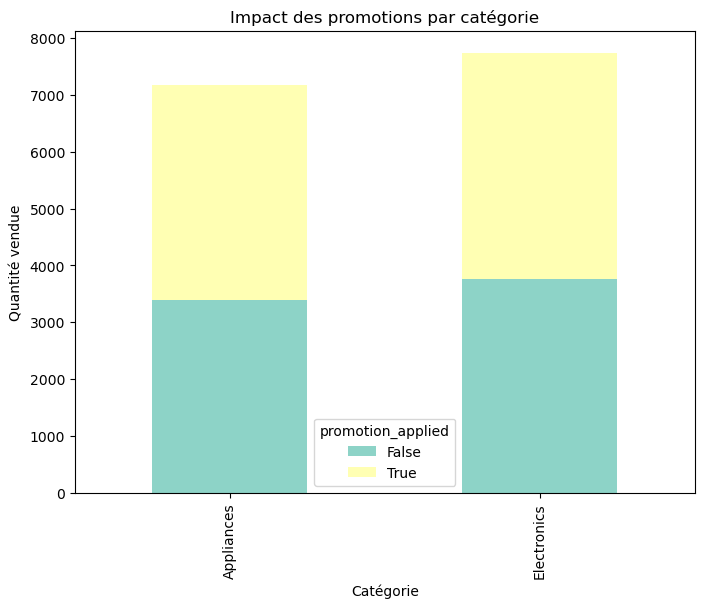

In [73]:
promotion_par_categorie= df_walmart.groupby(['category', 'promotion_applied'])['quantity_sold'].sum().unstack()
promotion_par_categorie.plot(kind='bar', stacked=True, title='Impact des promotions par catégorie', figsize=(8, 6), color=sns.color_palette('Set3'))
plt.xlabel('Catégorie')
plt.ylabel('Quantité vendue')
plt.show()

Tendance des ventes par catégorie au fil du temps (Lignes multiples)

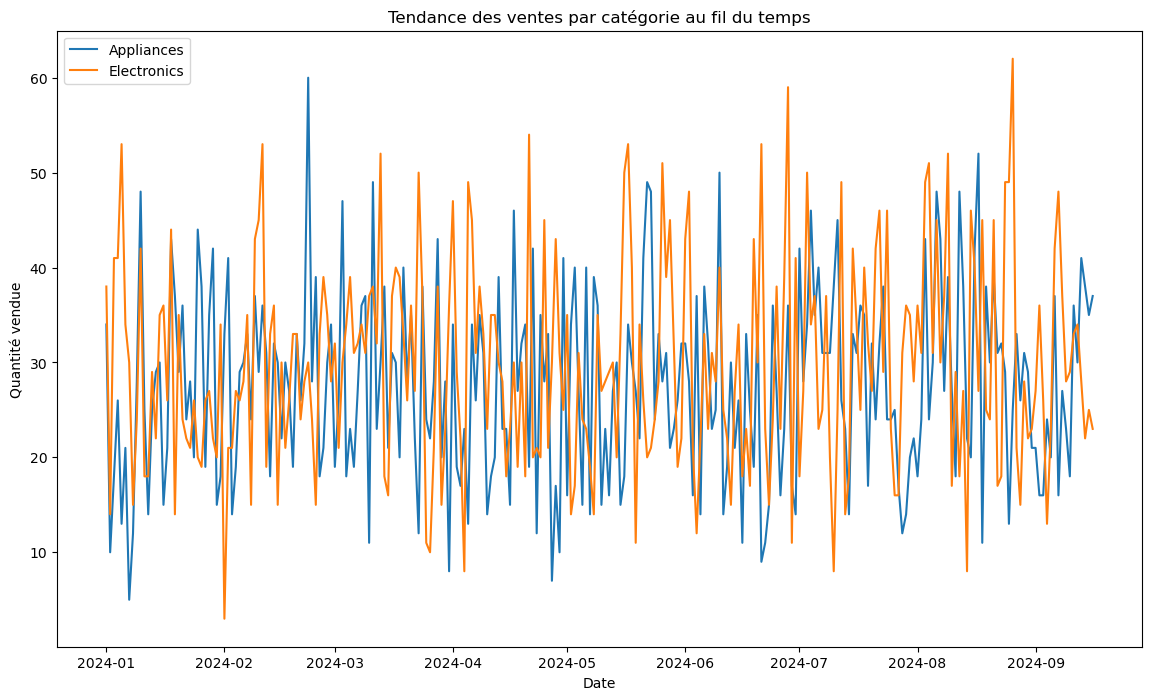

In [82]:
sales_by_date_category = df_walmart.groupby(['transaction_date', 'category'])['quantity_sold'].sum().unstack()
plt.figure(figsize=(14, 8))
for category in sales_by_date_category.columns:
    plt.plot(sales_by_date_category.index, sales_by_date_category[category], label=category)
plt.title('Tendance des ventes par catégorie au fil du temps')
plt.xlabel('Date')
plt.ylabel('Quantité vendue')
plt.legend()
plt.show()

Top 5 des produits les plus vendus


--- Top 5 des produits les plus vendus ---

product_name
Fridge        1967
Tablet        1964
TV            1926
Smartphone    1876
Camera        1873
Name: quantity_sold, dtype: int64


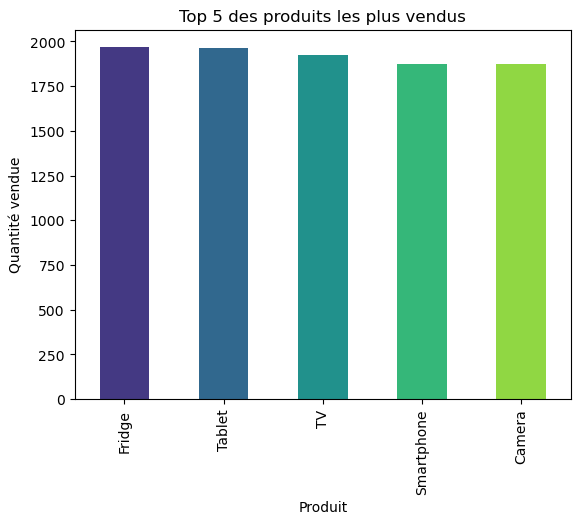

In [108]:
meilleurs_produits = df_walmart.groupby('product_name')['quantity_sold'].sum().sort_values(ascending=False).head(5)
print("\n--- Top 5 des produits les plus vendus ---\n")
print(meilleurs_produits)
meilleurs_produits.plot(kind='bar', title='Top 5 des produits les plus vendus', color=sns.color_palette('viridis', len(meilleurs_produits)))
plt.xlabel('Produit')
plt.ylabel('Quantité vendue')
plt.show()

les 5 produits les moins vendus


--- Top 5 des produits les moins vendus ---

product_name
Laptop             1685
Washing Machine    1807
Headphones         1816
Camera             1873
Smartphone         1876
Name: quantity_sold, dtype: int64


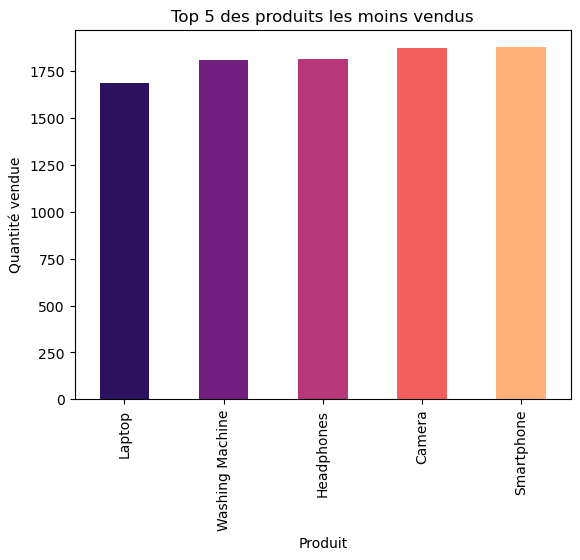

In [113]:
produits_moins_vendus = df_walmart.groupby('product_name')['quantity_sold'].sum().sort_values(ascending=True).head(5)
print("\n--- Top 5 des produits les moins vendus ---\n")
print(produits_moins_vendus)
produits_moins_vendus.plot(kind='bar', title='Top 5 des produits les moins vendus', color=sns.color_palette('magma', len(produits_moins_vendus)))
plt.xlabel('Produit')
plt.ylabel('Quantité vendue')
plt.show()